In [55]:
#https://onlytojay.medium.com/mnist-cnn-optimizer-comparison-with-tensorflow-keras-163735862ecd
#https://keras.io/api/layers/convolution_layers/convolution2d/


In [56]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [58]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 - 24s - loss: 0.2470 - accuracy: 0.9264 - val_loss: 0.0819 - val_accuracy: 0.9767 - 24s/epoch - 13ms/step
Epoch 2/5
1875/1875 - 16s - loss: 0.0830 - accuracy: 0.9751 - val_loss: 0.0595 - val_accuracy: 0.9824 - 16s/epoch - 9ms/step
Epoch 3/5
1875/1875 - 16s - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0493 - val_accuracy: 0.9837 - 16s/epoch - 9ms/step
Epoch 4/5
1875/1875 - 25s - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0488 - val_accuracy: 0.9838 - 25s/epoch - 13ms/step
Epoch 5/5
1875/1875 - 20s - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0414 - val_accuracy: 0.9856 - 20s/epoch - 11ms/step


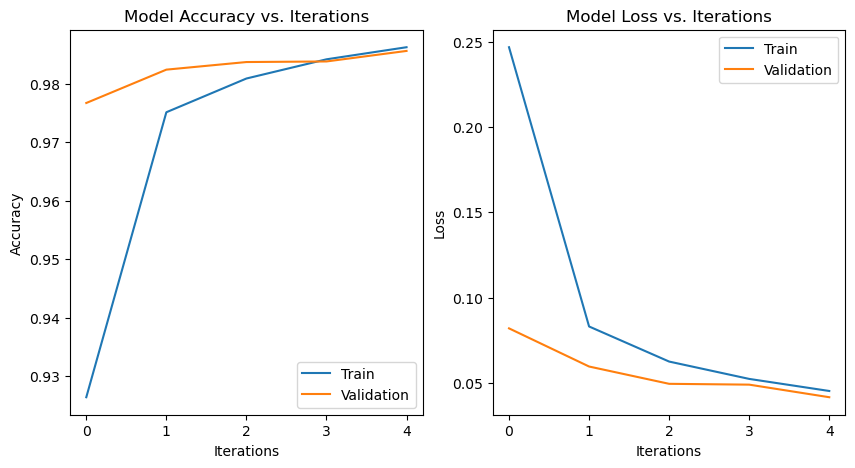

In [59]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()